In [15]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import scipy.ndimage as sn

import sys
main_dir = '../'
sys.path.append(main_dir)

import opennu as on
import gammas as ga

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

In [17]:
ga1 = ga.compute_gav_matrix(1, 1)
ga2 = ga.compute_gav_matrix(129, 54)

In [39]:
print(np.abs(ga1**2)[0,0])
print(np.abs(ga2**2)[0,0])

0.2500000000000001
110.25


In [40]:
110.25/0.25

441.0

In [42]:
129

129

In [12]:
%%time
de, c2, _ = on.get_delta_jz(10, 0.15, T2=10, Nshots=10, seed=42, d_init=1e10, d_fin=2e14, ndelta=200, squid_noise_ratio=0.0)
print("%.3e"%de)
print("%.3e"%(de/100**(1.3)/10))

2.082e+11
5.229e+07
CPU times: user 3.19 s, sys: 983 µs, total: 3.19 s
Wall time: 3.19 s


In [43]:
%%time
de, c2, _ = on.get_delta_jz(10, 0.15, T2=1000, Nshots=10, seed=42, d_init=1e10, d_fin=2e17, ndelta=200, squid_noise_ratio=0.0, 
                            A=1, Z=1, gy=42.58e6)
print("%.3e"%de)
#print("%.3e"%(de/100**(1.3)/10))
print("%.3e"%(de/10))

2.093e+11
2.093e+10
CPU times: user 5min 10s, sys: 43.4 s, total: 5min 53s
Wall time: 3min 31s


In [44]:
2.093*(0.15/0.1)

3.1394999999999995

In [5]:
mnl = np.linspace(0.06, 1, 30)
dell_m = []

for m in tqdm.tqdm(mnl):
    de, c2, _ = on.get_delta_jz(1,m, T2=10, Nshots=10, seed=42, d_init=1e11, d_fin=2e14, ndelta=200, squid_noise_ratio=10.0)
    dell_m.append(de)

dell_m = np.array(dell_m)

100%|█████████████████████████████████████████████████████████████████████████| 30/30 [03:32<00:00,  7.09s/it]


In [3]:
dell_m

array([2.22274143e+14, 1.61485438e+14, 1.37643459e+14, 1.27076921e+14,
       1.20487156e+14, 1.14239113e+14, 1.11237664e+14, 1.08315072e+14,
       1.08315072e+14, 1.05469267e+14, 1.05469267e+14, 1.05469267e+14,
       1.05469267e+14, 1.05469267e+14, 1.02698231e+14, 1.02698231e+14,
       1.02698231e+14, 1.02698231e+14, 1.02698231e+14, 1.02698231e+14,
       1.02698231e+14, 1.02698231e+14, 1.02698231e+14, 1.02698231e+14,
       1.02698231e+14, 1.02698231e+14, 1.02698231e+14, 1.02698231e+14,
       1.02698231e+14, 1.02698231e+14])

In [302]:
(10/2)**2

25.0

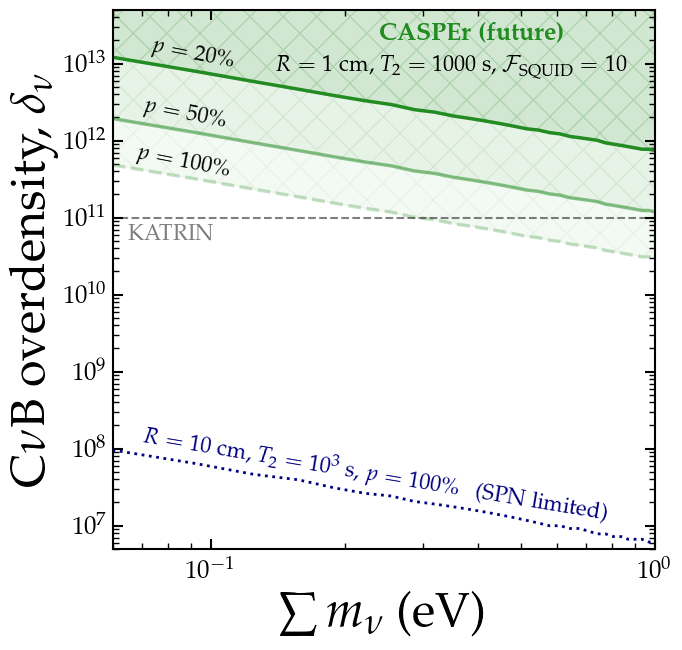

In [325]:


# n10 = np.loadtxt("/home/g/Desktop/mnu_dep_parallel.txt")
# data = np.loadtxt("/home/g/Desktop/mnu2.txt")
data = np.loadtxt("/home/g/Desktop/mnu_90.txt")
data2 = np.loadtxt("/home/g/Desktop/mnu_90_2.txt")

fig, ax = plt.subplots(figsize=(7,7))


c1 = 'forestgreen'
c2 = 'navy'

ff = 1/(100**(1.3))
ss = 25

#plt.loglog(data[:,0], data[:,1]/10)
plt.loglog(mnl, dell_m*ss*ff, c=c1, lw=2.5)
plt.fill_between(mnl, dell_m*ss*ff, 1e16*np.ones(len(mnl)), alpha=0.2, color=c1, hatch='X')

plt.loglog(mnl, dell_m*4*ff, c=c1, lw=2.5, alpha=0.5)
plt.fill_between(mnl, dell_m*4*ff, dell_m*ss*ff, alpha=0.1, color=c1, hatch='X')

plt.loglog(mnl, dell_m*ff, c=c1, lw=2.5, alpha=0.25, ls='--')
plt.fill_between(mnl, dell_m*ff, dell_m*4*ff, alpha=0.05, color=c1, hatch='X')


plt.text(0.24,2e13,r'{\bf CASPEr (future)}', fontsize=18, c=c1)
plt.text(0.14,7.75e12,r'$R=1$ cm, $T_2=1000$ s, ${\cal F}_{\rm SQUID}=10$', fontsize=16, c='k')

plt.text(0.073,9e12,r'$p=20\%$', fontsize=16,c='k', alpha=1, rotation=-11)
plt.text(0.07,1.5e12,r'$p=50\%$', fontsize=16,c='k', alpha=1, rotation=-11)
plt.text(0.0675,3.5e11,r'$p=100\%$', fontsize=16,c='k', alpha=1, rotation=-11)


plt.loglog(data[:,0], data[:,1]/3, c=c2, lw=2, ls='dotted')
plt.text(0.07,1.2e7,r'$R=10$ cm, $T_2=10^3$ s, $p=100\%$ ~~(SPN limited)', fontsize=16,c=c2, rotation=-9.5)

mm = np.geomspace(1e-3, 1,100)
plt.text(6.5e-2, 5e10, 'KATRIN', fontsize=16, alpha=0.5, c='k')
plt.loglog(mm, mm/mm*1e11, ls='--', lw=1.5, alpha=0.5, c='k')

# plt.text(0.8e-1, 3e11, r'Arvanitaki et al., ~~$R=10$ cm, $T_2=10^3$ s ~($^1$H)', fontsize=16, alpha=0.5, c='k')
# plt.loglog(mm, mm/mm*2e11, ls='--', lw=1.5, alpha=0.5, c='k')

# plt.hlines(4.7e7,mm[0], mm[-1])
# plt.axvline(0.15)

plt.xlabel(r'$\sum m_{\nu}$ (eV)')
plt.ylabel(r'C$\nu$B overdensity, $\delta_{\nu}$')
plt.xlim(6e-2, 1)
plt.ylim(5e6, 5e13)
plt.show()
#fig.savefig(main_dir+'plots/deltanu.pdf', bbox_inches='tight')

In [50]:
N = 3e22*10**3*4*np.pi/3
N

1.2566370614359174e+26

In [71]:
gr, gm = ga.compute_ratio(0.1, 1e-9, A=129, Z=54)
gm

3.3572495935505678e-46

In [72]:
knu  = 1/0.037
fsup = (knu*10)**2
gm*(1e26)**2/fsup*2

91.92149387141457

In [66]:
2*np.pi/(0.21)

29.919930034188507

In [67]:
1/0.037

27.027027027027028

In [195]:
%%time
# de1, c2, _ = on.get_delta_jz(10,1e-5, T2=10, Nshots=10, seed=42, d_init=1e13, d_fin=1e16, ndelta=200, squid_noise_ratio=0.0,
#                               A=3, Z=2,gy=32.43e6, B=0.01)
# print("%.3e"%de1)
# de2, c2, _ = on.get_delta_jz(10,1e-5, T2=10, Nshots=10, seed=42, d_init=1e13, d_fin=1e16, ndelta=200, squid_noise_ratio=0.0,
#                                A=1, Z=1,gy=42.58e6, B=0.01)
# print("%.3e"%de2)

de3, c2, _ = on.get_delta_jz(10,0.5, T2=10, Nshots=10, seed=42, d_init=1e10, d_fin=1e14, ndelta=200, squid_noise_ratio=0.0, B=0.1)
print("%.3e"%de3)

6.368e+10
CPU times: user 2.39 s, sys: 3.01 ms, total: 2.4 s
Wall time: 2.39 s


In [250]:
129/2

64.5

In [251]:
nmr_targets = [
    (129, 54),  # Xe-129
    (1,   1),   # H-1 (proton)
    (3,   2),   # He-3
    (13,  6),   # C-13
    (19,  9),   # F-19
    (31, 15),   # P-31
    (59, 27),   # Co-59
    (195, 78),  # Pt-195
]

A_vals, Z_vals, gm_vals = [], [], []

for A, Z in nmr_targets:
    gm = ga.compute_ratio(0.1, 1e-9, A=A, Z=Z)[1]
    #print(gm)
    print((-A/2+Z)**2)
    A_vals.append(A)
    Z_vals.append(Z)
    gm_vals.append(gm)

110.25
0.25
0.25
0.25
0.25
0.25
6.25
380.25


In [286]:
A = 129; Z=54
gm = ga.compute_ratio(0.15, 5e-9, A=A, Z=Z)[1]
gm

5.0405835945781486e-46

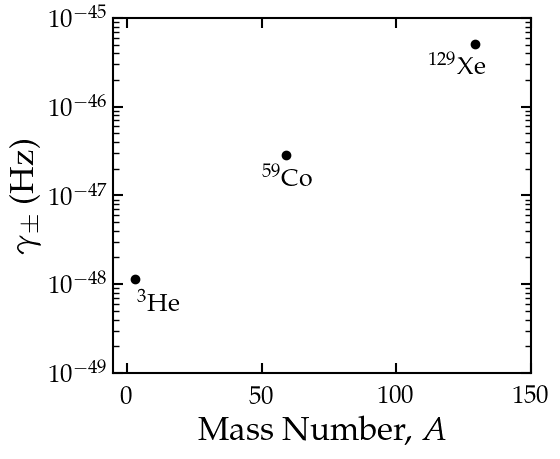

In [299]:
# Scatter plot of g/m vs A and Z
fig, ax = plt.subplots(figsize=(6, 5))

A = 129; Z=54
gm = ga.compute_ratio(0.15, 5e-9, A=A, Z=Z)[1]
ax.scatter(A, gm, c='k')
plt.text(112, 2.4e-46, r'$^{129}$Xe', fontsize=18)

A = 59; Z=27
gm = ga.compute_ratio(0.15, 5e-9, A=A, Z=Z)[1]
ax.scatter(A, gm, c='k')
plt.text(50, 1.3e-47, r'$^{59}$Co', fontsize=18)

A = 3; Z=2
gm = ga.compute_ratio(0.15, 5e-9, A=A, Z=Z)[1]
ax.scatter(A, gm, c='k')
plt.text(4, 0.5e-48, r'$^{3}$He', fontsize=18)

plt.xlim(-5, 150)
plt.ylim(1e-49, 1e-45)

ax.set_xlabel('Mass Number, $A$', fontsize=24)
ax.set_ylabel(r'$\gamma_\pm$ (Hz)', fontsize=24)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

In [233]:
ga.compute_ratio(0.1, 1e-9, A=129, Z=1)[1]

1.2278702651786194e-44

In [159]:
mnl = np.linspace(1e-5, 0.5, 100)
dell_m_he3 = []

for m in tqdm.tqdm(mnl):
    de, c2, _ = on.get_delta_jz(10,m, T2=10, Nshots=10, seed=42, d_init=1e12, d_fin=1e16, ndelta=80, squid_noise_ratio=0.0,
                               A=3, Z=2,gy=32.43e6, B=0.01)
    dell_m_he3.append(de)

dell_m_he3 = np.array(dell_m_he3)

100%|█████████████████████████████████████████| 100/100 [03:49<00:00,  2.29s/it]


In [182]:
mnl = np.linspace(1e-5, 0.5, 100)
dell_m_h1 = []

for m in tqdm.tqdm(mnl):
    de, c2, _ = on.get_delta_jz(10,m, T2=10, Nshots=10, seed=42, d_init=1e12, d_fin=1e16, ndelta=200, squid_noise_ratio=0.0,
                               A=1, Z=1,gy=42.58e6, B=0.01)
    dell_m_h1.append(de)

dell_m_h1 = np.array(dell_m_h1)

100%|█████████████████████████████████████████| 100/100 [07:52<00:00,  4.72s/it]


In [196]:
mnl = np.linspace(1e-5, 0.5, 100)
dell_m_xe = []

for m in tqdm.tqdm(mnl):
    de, c2, _ = on.get_delta_jz(10,m, T2=10, Nshots=10, seed=42, d_init=1e10, d_fin=1e14, ndelta=200, squid_noise_ratio=0.0,)
    dell_m_xe.append(de)

dell_m_xe = np.array(dell_m_xe)

100%|█████████████████████████████████████████| 100/100 [05:33<00:00,  3.33s/it]


In [184]:
# Digitise from 2507.14287
pair_abs = np.array([[0.0005177804903556527, 1657834326.7389877],
[0.07786413634147336, 1688824073.6577861],
[0.10204972715309346, 1714415017.035888],
[0.15311700072452655, 1741263547.1626225],
[0.27763041550136264, 1845905783.0879643],
[0.4318588848004305, 1955728771.2530704],
[0.6363877327067246, 2130669274.627967],
[0.97222098328159, 2387681798.680744],
[1.3944324890661355, 2601000694.336299],
[1.98204807003649, 2833283426.0644603]])

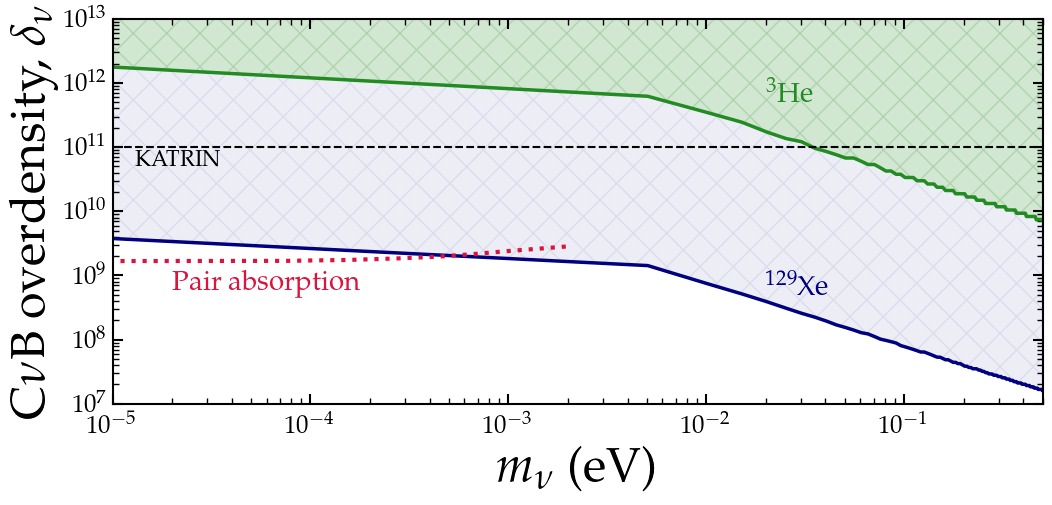

In [300]:
fig, ax = plt.subplots(figsize=(12,5))

data = np.loadtxt("/home/g/Desktop/mnu_90.txt")

c1 = 'forestgreen'
c2 = 'navy'

ff = 1/(100**(1.3))*1/10
# ss = 25

plt.loglog(mnl, dell_m_he3*ff, c=c1, lw=2.5, label=r'$^{3}$He')
plt.fill_between(mnl, dell_m_he3*ff, 1e18*np.ones(len(mnl)), alpha=0.2, color=c1, hatch='X')

plt.loglog(mnl, dell_m_xe*ff, c=c2, lw=2.5, label=r'$^{129}$Xe')
plt.fill_between(mnl, dell_m_xe*ff,  dell_m_he3*ff, alpha=0.07, color=c2, hatch='X')

plt.text(2e-2,5e11, r'$^{3}$He', rotation=0,c=c1)
plt.text(2e-2,5e8, r'$^{129}$Xe', rotation=0,c=c2)
plt.text(2e-5, 6e8, r'Pair absorption', rotation=0,c='crimson')


plt.loglog(pair_abs[:,0]/1e3, pair_abs[:,1], ls='dotted',c='crimson')

mm = np.geomspace(1e-5, 1,100)
plt.text(1.3e-5, 5e10, 'KATRIN', fontsize=16, alpha=1, c='k')
plt.loglog(mm, mm/mm*1e11, ls='--', lw=1.5, alpha=1, c='k')
yy = np.geomspace(1e7, 1e15,100)
# plt.fill_betweenx(yy, 0.12*3, 1,color='k', alpha=0.25)
# plt.text(0.15, 1e9, 'Planck', fontsize=18)

plt.xlabel(r'$m_{\nu}$ (eV)')
plt.ylabel(r'C$\nu$B overdensity, $\delta_{\nu}$')
plt.xlim(1e-5, 0.5)
plt.ylim(1e7, 1e13)
plt.show()

In [ ]:
# Smooth version
# y = data3[:,1]/10
# pad_width = 10
# y_padded = np.pad(y, (pad_width, pad_width), mode='edge')
# y_smooth = sn.gaussian_filter(y_padded, sigma=2)
# y_smooth = y_smooth[pad_width:-pad_width] 
# plt.loglog(data3[:,0], y_smooth)

# plt.loglog(data3[:,0], y_smooth*100)

In [103]:
#gy = 42.58e6
gy = 32.43e6
eVHz   = 1 / 6.58e-16
w0     = 2 * np.pi * gy * 0.01 / eVHz
w0

1.3407651427878679e-09

In [ ]:
eVHz   = 1 / 6.58e-16

In [114]:
1e-6*eVHz/1e6

1519.7568389057749

In [115]:
1e7/eVHz

6.58e-09

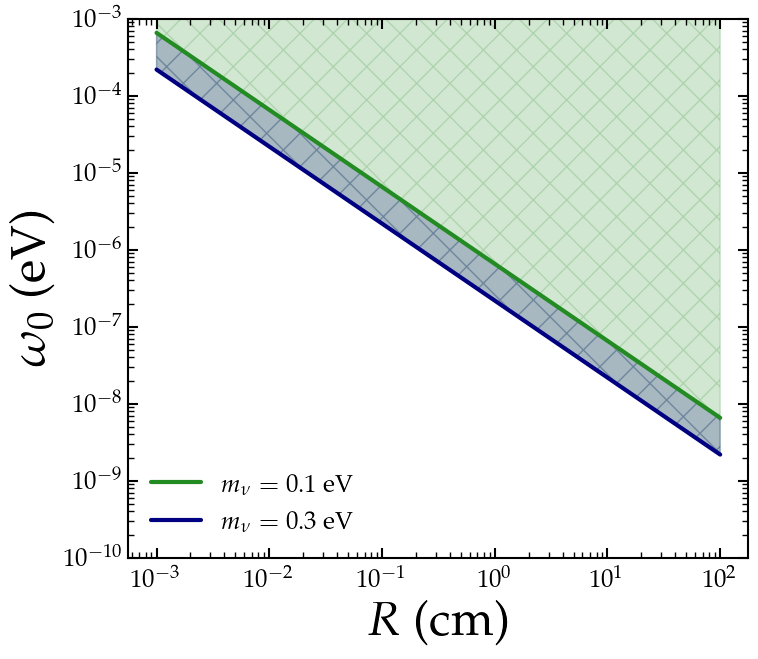

In [148]:
ww = np.geomspace(1e-10, 1e-5,100)
rr = np.geomspace(0.001, 100,100)

m1 = 0.1
m2 = 0.3
knu = 5.3e-4
vnu = knu/m

c1 = 'forestgreen'
c2 = 'navy'

plt.loglog(rr,knu/m1/rr/8065, color=c1, label=r'$m_\nu=0.1$ eV')
plt.fill_between(rr, knu/m2/rr/8065,  1, alpha=0.2, hatch='X', color=c1)
plt.loglog(rr,knu/m2/rr/8065, color=c2, label=r'$m_\nu=0.3$ eV')
plt.fill_between(rr, knu/m2/rr/8065, knu/m1/rr/8065, alpha=0.2, hatch='X', color=c2)

plt.xlabel(r'$R$ (cm)')
plt.ylabel(r'$\omega_0$ (eV)')
plt.ylim(1e-10, 1e-3)
plt.legend(loc=3, fontsize=18)
plt.show()

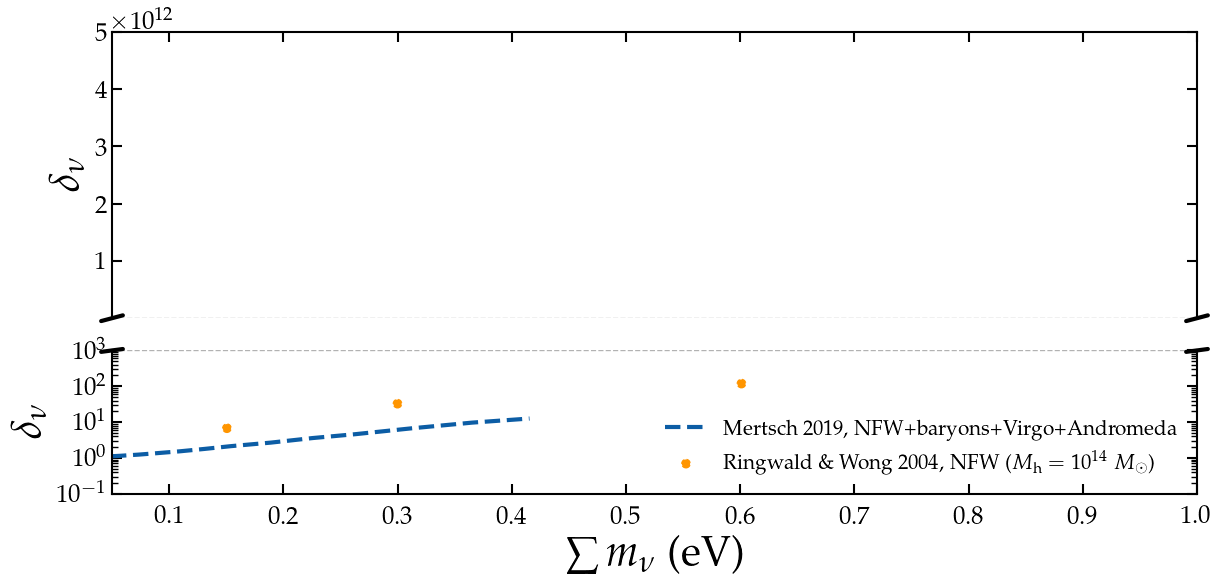

In [5]:
fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.5], hspace=0.15)


lim_1 = 5e12
lim_2 = 5e7
lim_3 = 1e3

ax_top = plt.subplot(gs[0])
ax_bot = plt.subplot(gs[1], sharex=ax_top)


ax_top.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False)
ax_bot.tick_params(axis='x', which='both', top=False)


#ax_top.loglog(mm, dl)
# ax_top.loglog(mm, sn.gaussian_filter(dl, sigma=0.8),label=r'$N=10^{22}$')
# ax_top.loglog(mm, sn.gaussian_filter(dl, sigma=0.8)/1e3,label=r'$N=10^{25}$')

#ax_bot.loglog(mm, dl)
gr = np.loadtxt("/home/g/Desktop/grav_clust.txt", delimiter=',')
w14 = np.loadtxt("/home/g/Desktop/Wong_1e14.txt", delimiter=',')
ax_bot.loglog(gr[:,0]*1e-3, 1+gr[:,1], ls='--', label='Mertsch 2019, NFW+baryons+Virgo+Andromeda')
ax_bot.scatter(w14[:,0]/10, w14[:,1], ls='--', c='C2', label=r'Ringwald \& Wong 2004, NFW~($M_{\rm h}=10^{14}~M_{\odot}$)')


ax_top.set_ylim(lim_2, lim_1)
ax_bot.set_ylim(0.1, lim_3)
ax_bot.set_xlim(0.05, 1)

ax_top.set_xscale('linear')
ax_bot.set_xscale('linear')
ax_bot.set_xticks(np.linspace(0.1,1,10))

ax_top.spines['bottom'].set_visible(False)
ax_bot.spines['top'].set_visible(False)
ax_top.tick_params(labelbottom=False) 


ax_top.axhline(lim_2, color='gray', linestyle='--', linewidth=1, alpha=0.6)
ax_bot.axhline(lim_3, color='gray', linestyle='--', linewidth=1, alpha=0.6)


# Diagonal break marks
d = .01 
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax_bot.transAxes)
ax_bot.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax_bot.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

ax_bot.set_xlabel(r'$\sum m_{\nu}$ (eV)', fontsize=30)
ax_top.set_ylabel(r'$\delta_{\nu}$', fontsize=30)
ax_bot.set_ylabel(r'$\delta_{\nu}$', fontsize=30)
ax_bot.legend()

plt.show()